# VALIDATION LAB: mtcars
***


In [1]:
import numpy as np
import matplotlib.pyplot as pltb
import pandas as pd

#### IMPORT DATA
***

In [2]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### CLEAN DATA
***

In [3]:
# y is the response variable so let's slice that off
y = dfcars['mpg']

In [4]:
#We have multiple possible X's let's put them aside too, we don't want the first two columns
allX = dfcars.iloc[:, 2:]

In [5]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### SEPERATE THE DATA 
***

In [6]:
#separate the data into a training set and a test set. We can use train_test_split for this
from sklearn.model_selection import train_test_split

In [7]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

#### VALIDATION
***

Cross-validation is a model evaluation technique that helps you measure how well your machine learning model generalizes to unseen data.

Instead of training and testing the model once, cross-validation splits your training data into multiple parts (folds), 
and the model is trained and tested multiple times — each time on a different subset of the data.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
# try with one variable "wt"  (model5 0.57)
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [11]:
# This performs cross-validation on the linear regression model. 
# It uses the training data: X_train (features) and y_train (target/labels). 

# cross_val_score Splits your training data into k folds (default is 5 folds). 
# It trains the model on k−1 folds, and tests it on the remaining fold, repeating this k times. 

# Each run returns a score (by default, for regression it's R² score — 
# how well the model fits). The result: a list/array of scores, one for each fold.

model5 = LinearRegression()
scores5 = cross_val_score(model5, X_train, y_train)
scores5

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [12]:
scores5.mean()

0.5711128154689782

In [13]:
# now with two variables (model6 0.63) )
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [14]:
model6 = LinearRegression()
scores6 = cross_val_score(model6, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [15]:
scores6.mean()

0.6332786406507417

In [16]:
# now with three variables (model7 0.65)
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [17]:
model7 = LinearRegression()
scores7 = cross_val_score(model7, X_train, y_train)
scores7.mean()

0.6571279909053493

In [18]:
# again with 3 variables but different ones (model8 0.60)
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [19]:
model8 = LinearRegression()
scores8 = cross_val_score(model8, X_train, y_train)
scores8.mean()

0.6036599344425267

In [20]:
# best so far is model7 - A score of .79 for the test set. So let's build that model fully and then evaluate that
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.7900492843805198

In [21]:
# Goal is to train a Linear Regression model to predict a target (y_train, y_test) using a subset of features ("wt", "hp", and "drat"), 
# and then evaluating how well it performs on test data.

# X_train = allX_train[["wt","hp","drat"]]: You're selecting only 3 specific columns ("wt", "hp", "drat") 
# from your full training data allX_train.X_train will now only contain these three features (variables) for training.

# X_test = allX_test[["wt","hp","drat"]]: Same thing, but for the test set. 
# You're ensuring that both training and testing sets use the same features ("wt", "hp", "drat").

# model7 = LinearRegression(): You're creating a new instance of a Linear Regression model from sklearn.linear_model. 
# At this point, the model is empty — it's just created, not yet trained.

# model7.fit(X_train, y_train):Now you're training the model using the training data:X_train: 
# The input features (wt, hp, drat) & y_train: 
# The target/output you're trying to predict. The model learns the best-fitting line/plane in multidimensional space to predict y.

# model7.score(X_test, y_test): You're now evaluating how well the trained model performs on unseen test data. 
# score() by default returns the R² score (coefficient of determination). R² Score: 
# Measures how well the model predicts the target. 
# The Range: 1.0 = perfect prediction / 0.0 = model does no better than the mean / Negative = model is worse than just guessing the mean

#### POLYNOMIAL REGRESSION EXAMPLE
***

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [23]:
# Assuming allX_train is already defined and contains the data
X_train = allX_train[["wt"]]  # Feature of interest

In [24]:
# Split the data into training and validation sets
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train,test_size=0.3, random_state=42)

In [25]:
X_v_train.shape

(17, 1)

In [26]:
X_v_valid.shape

(8, 1)

In [27]:
# Initialize the PolynomialFeatures transformer (degree 2)
poly_transformer = PolynomialFeatures(degree=2)

In [28]:
# Fit and transform the training set
X_v_train_poly = poly_transformer.fit_transform(X_v_train)

In [29]:
# Use the same transformer to transform the validation set
X_v_valid_poly = poly_transformer.transform(X_v_valid)

In [30]:
# Initialize the linear regression model
modelpoly2 = LinearRegression()


In [31]:
# Train the model on the polynomial transformed training set
modelpoly2.fit(X_v_train_poly, y_v_train)

LinearRegression()

In [32]:
# Evaluate the model on both training and validation sets
train_score = modelpoly2.score(X_v_train_poly, y_v_train)
valid_score = modelpoly2.score(X_v_valid_poly, y_v_valid)

# Print R-squared values
print(f"Training set score: {train_score}")
print(f"Validation set score: {valid_score}")

Training set score: 0.7762204596955044
Validation set score: 0.8441441546348556


Key Changes:

Transform Both X_v_train and X_v_valid with the Same Polynomial Transformer: This ensures consistency between how the model is trained and tested.

Use fit_transform on the training set (X_v_train) to fit and apply the transformation.

Use transform on the validation set (X_v_valid) to apply the same transformation without fitting.

Fit the Model on the Transformed Data (X_v_train_poly), not the original X_v_train. This is crucial because you're trying to train a model that works with the polynomial features, not the original ones.

Explanation:

The issue with getting the same score on both training and validation sets was because the polynomial transformation was being done separately for each set. This can lead to overfitting since the model sees the same transformation on both sets. By transforming both sets with the same fit_transform on the training set and transform on the validation set, you ensure the model is evaluated correctly.

Now, when you run this code, you should see a more reasonable difference between the training and validation scores.

In [45]:
degrees = range(1, 6)  #Testing different polynomial degrees 
train_mean_scores = []  #Stores cross-validation R2 scores for each degree
test_scores = []        #Stores test set R2 scores for each degree
error_train = []        #Stores MSE for the training set for each degree
error_test = []        #Stores MSE for the test set for each degree

#Evaluate each degree by creating a polynomial regression model run cross-validation
for d in degrees:
    #Calculate the poly features
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    X_test_poly = PolynomialFeatures(d).fit_transform(X_test)
    model = LinearRegression()
    
    #Perform cross-validation on the training set and get the R2 score as above
    train_scores = cross_val_score(model, X_train_poly, y_train)
    train_score = train_scores.mean()
    train_mean_scores.append(train_score)
    
    #Fit the model on the poly training set and score on the poly test set
    model.fit(X_train_poly, y_train)
    mse_train = mean_squared_error(model.predict(X_train_poly), y_train)
    error_train.append(mse_train)    #Record MSE for training set
    test_score = model.score(X_test_poly, y_test)
    mse_test = mean_squared_error(model.predict(X_test_poly), y_test)
    error_train.append(mse_test)    #Record MSE for test set
    test_scores.append(test_score)
    
    #Display the train and test scores for each degree
    print(f"Degree {d}: Train CV Mean R^2 Score = {train_score:.3f}, Test R^2 Score = {test_score:.3f}, TRain MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")

Degree 1: Train CV Mean R^2 Score = 0.571, Test R^2 Score = 0.688, TRain MSE = 7.774, Test MSE = 12.476
Degree 2: Train CV Mean R^2 Score = 0.737, Test R^2 Score = 0.682, TRain MSE = 4.909, Test MSE = 12.708
Degree 3: Train CV Mean R^2 Score = 0.735, Test R^2 Score = 0.682, TRain MSE = 4.906, Test MSE = 12.719
Degree 4: Train CV Mean R^2 Score = 0.698, Test R^2 Score = 0.667, TRain MSE = 4.892, Test MSE = 13.311
Degree 5: Train CV Mean R^2 Score = 0.648, Test R^2 Score = 0.511, TRain MSE = 4.454, Test MSE = 19.545


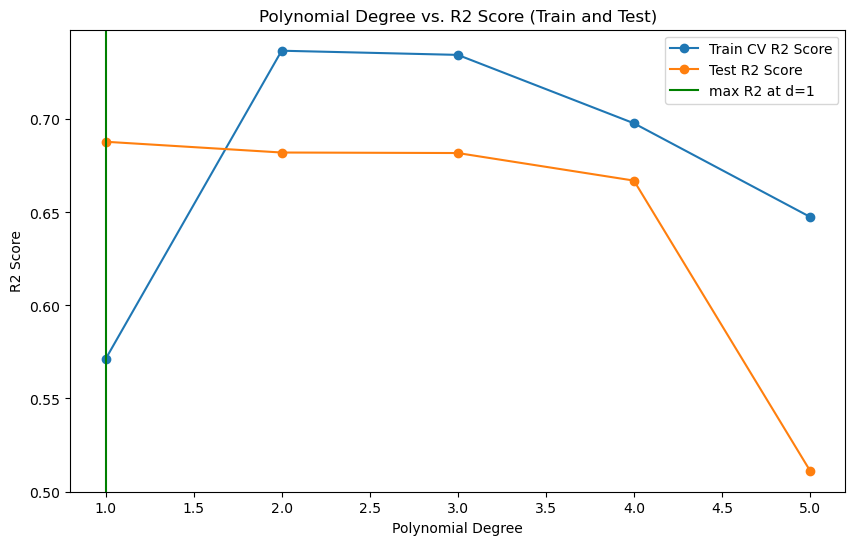

The optimal polynomial degree is 1 with a test R2 score of 0.688.


In [46]:
#Plot results 
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mean_scores, marker='o', label='Train CV R2 Score')
plt.plot(degrees, test_scores, marker='o', label='Test R2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Polynomial Degree vs. R2 Score (Train and Test)')

#Find and display the best degree with the best R2 score on the test set
bestd = degrees[np.argmax(test_scores)]
plt.axvline(bestd, 0,1, color='g', label="max R2 at d=%d"%bestd)
plt.legend()
plt.show()
print(f"The optimal polynomial degree is {bestd} with a test R2 score of {max(test_scores):.3f}.")

In [33]:
#Define degrees to test ---
degrees = range(1, 8)
degrees = range(1, 8)


In [34]:
error_train = np.empty(len(degrees))
error_valid = np.empty(len(degrees))
score_train = np.empty(len(degrees))
score_valid = np.empty(len(degrees))

In [35]:
# --- Step 1: Loop through degrees ---
for i, d in enumerate(degrees):  # enumerate gives both index (i) and degree (d)
    # Create polynomial transformer and transform both train and validation data
    poly = PolynomialFeatures(degree=d)
    X_c = poly.fit_transform(X_v_train)
    X_c_val = poly.transform(X_v_valid)
    
    # Fit model on smaller training set
    est = LinearRegression()
    est.fit(X_c, y_v_train)
    
    # Predict
    y_train_pred = est.predict(X_c)
    y_valid_pred = est.predict(X_c_val)
    
    # Calculate errors
    error_train[i] = mean_squared_error(y_v_train, y_train_pred)
    error_valid[i] = mean_squared_error(y_v_valid, y_valid_pred)
    
    # Calculate R² scores
    score_train[i] = est.score(X_c, y_v_train)
    score_valid[i] = est.score(X_c_val, y_v_valid)

In [36]:
# --- Step 2: Find the degree that minimizes validation error ---
best_index = np.argmin(error_valid)
best_degree = degrees[best_index]
print(f"Best polynomial degree = {best_degree} (Validation MSE = {error_valid[best_index]:.4f})")

Best polynomial degree = 2 (Validation MSE = 7.5557)


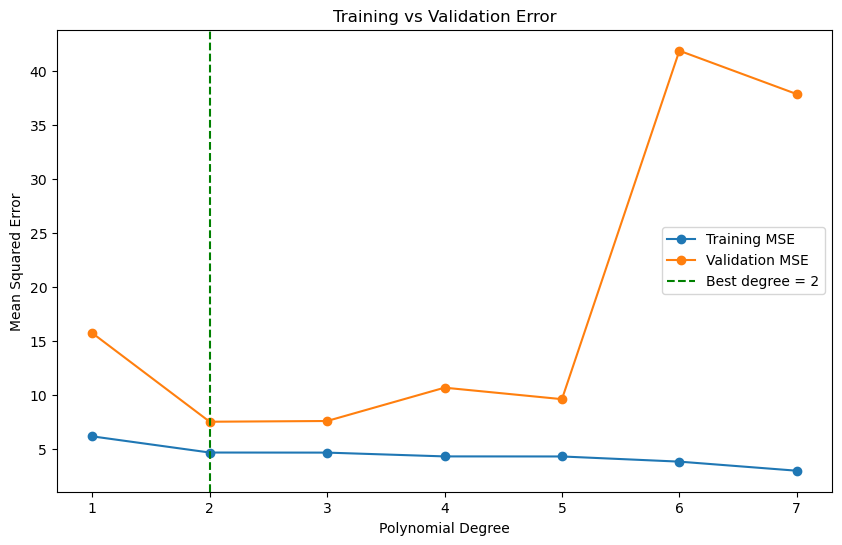

In [37]:
# --- Step 3: Plot training and validation error ---
plt.figure(figsize=(10,6))
plt.plot(degrees, error_train, marker='o', label='Training MSE')
plt.plot(degrees, error_valid, marker='o', label='Validation MSE')
plt.axvline(best_degree, color='g', linestyle='--', label=f'Best degree = {best_degree}')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Validation Error')
plt.legend()
plt.show()

#### RETRAIN ON FULL TRAINING SET
***

In [38]:
# --- Ensure X_train and X_test are numpy arrays to avoid feature name mismatch ---
X_train = np.array(X_train)
X_test = np.array(X_test)

In [39]:
degrees = range(1, 6)  # Test polynomial degrees 1 to 5

train_mean_scores = []  # Average CV R² score for training set
test_scores = []        # R² score for test set
error_train = []        # MSE for training set
error_test = []         # MSE for test set


In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (25, 1)
X_test shape: (7, 3)


In [41]:
X_train = allX_train[["wt"]]  # single column
X_test = allX_test[["wt"]]    # single column — must match!

In [42]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (25, 1)
X_test shape: (7, 1)


In [43]:
# --- Evaluate each polynomial degree ---
for d in degrees:
    # Create polynomial features (fit on training data, transform both)
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Create linear regression model
    model = LinearRegression()
    
    # Cross-validation R² score on training set
    train_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    train_mean = train_scores.mean()
    train_mean_scores.append(train_mean)
    
    # Fit on training data and evaluate on both training and test sets
    model.fit(X_train_poly, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # MSE calculations
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    error_train.append(mse_train)
    error_test.append(mse_test)
    
    # Test R² score
    test_r2 = model.score(X_test_poly, y_test)
    test_scores.append(test_r2)
    
    # Display results per degree
    print(f"Degree {d}: Train CV R²={train_mean:.3f}, Test R²={test_r2:.3f}, "
          f"Train MSE={mse_train:.3f}, Test MSE={mse_test:.3f}")

Degree 1: Train CV R²=0.571, Test R²=0.688, Train MSE=7.774, Test MSE=12.476
Degree 2: Train CV R²=0.737, Test R²=0.682, Train MSE=4.909, Test MSE=12.708
Degree 3: Train CV R²=0.735, Test R²=0.682, Train MSE=4.906, Test MSE=12.719
Degree 4: Train CV R²=0.698, Test R²=0.667, Train MSE=4.892, Test MSE=13.311
Degree 5: Train CV R²=0.648, Test R²=0.511, Train MSE=4.454, Test MSE=19.545


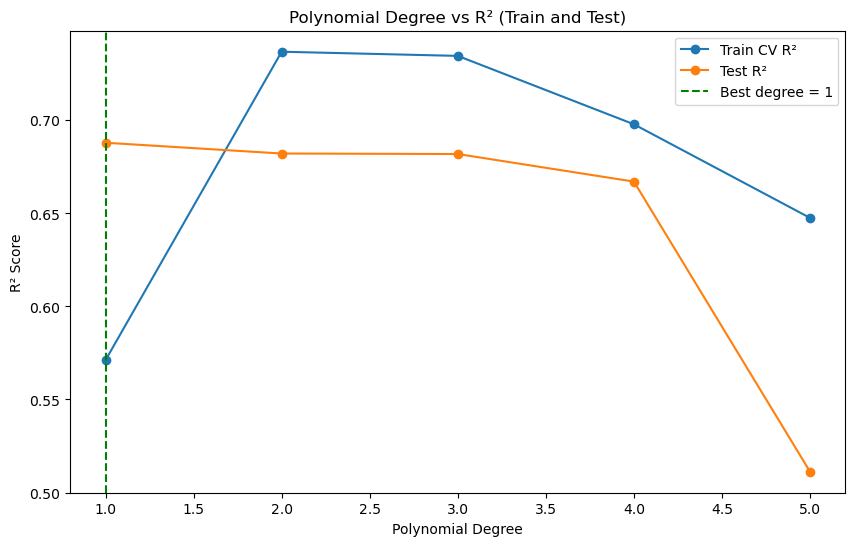

✅ Optimal polynomial degree: 1, with Test R² = 0.688


In [44]:
# --- Plot R² scores ---
plt.figure(figsize=(10,6))
plt.plot(degrees, train_mean_scores, marker='o', label='Train CV R²')
plt.plot(degrees, test_scores, marker='o', label='Test R²')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Polynomial Degree vs R² (Train and Test)')
bestd = degrees[np.argmax(test_scores)]
plt.axvline(bestd, color='g', linestyle='--', label=f"Best degree = {bestd}")
plt.legend()
plt.show()

print(f"✅ Optimal polynomial degree: {bestd}, with Test R² = {max(test_scores):.3f}")
